# Brain MRI Detection using different Machine Learning Models

## Team Members
- Mohammad Ali Zahir - ID: 40077619
- Marwa Khalid - ID: 40155098

## Required Librairies
**Run the cell below to install all the required libraries.**

In [72]:
import matplotlib.pyplot as plt 
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Displaying Data

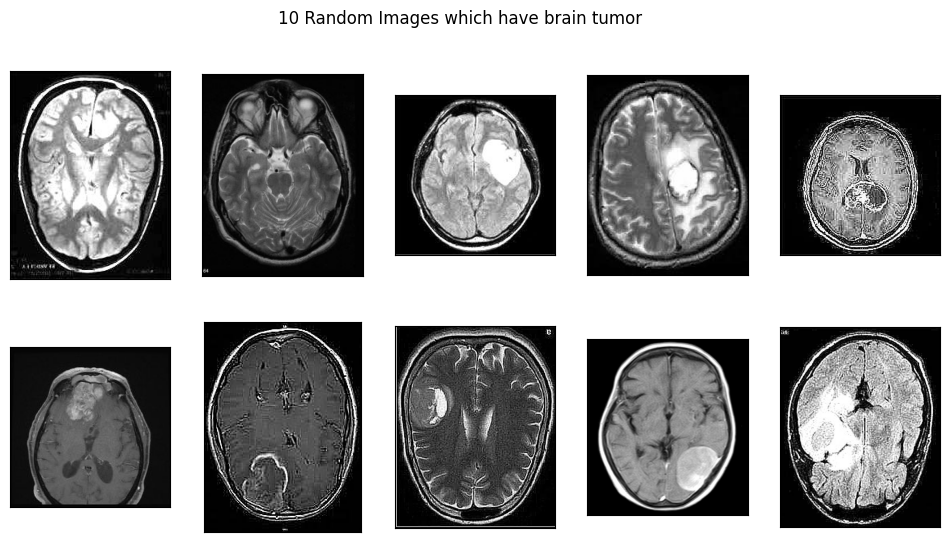

In [18]:
import os
import random
import matplotlib.pyplot as plt

folder_path = "data/yes"
image_list = os.listdir(folder_path)
random_images = random.sample(image_list, 10)

image_data = []  # List to store image data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image_path = os.path.join(folder_path, random_images[i])
    img = plt.imread(image_path)
    image_data.append(img)  # Append image to list
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("10 Random Images which have brain tumor")
plt.show()




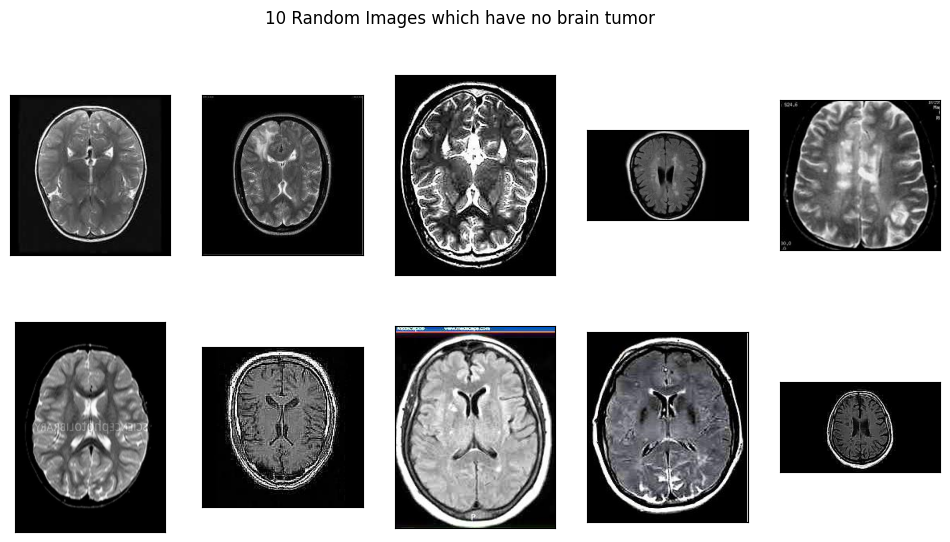

In [19]:
import os
import random
import matplotlib.pyplot as plt

folder_path = "data/no"
image_list = os.listdir(folder_path)
random_images = random.sample(image_list, 10)

image_data = []  # List to store image data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image_path = os.path.join(folder_path, random_images[i])
    img = plt.imread(image_path)
    image_data.append(img)  # Append image to list
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("10 Random Images which have no brain tumor")
plt.show()




# Normalizing and training the data

In [68]:
data_folder = "data"
image_extensions = [".jpg", ".jpeg"]  # List of image extensions

# Get list of files in the folders
yes_folder = os.path.join(data_folder, "yes")
yes_files = [os.path.join(yes_folder, f) for f in os.listdir(yes_folder) if os.path.splitext(f)[1].lower() in image_extensions]

no_folder = os.path.join(data_folder, "no")
no_files = [os.path.join(no_folder, f) for f in os.listdir(no_folder) if os.path.splitext(f)[1].lower() in image_extensions]

# Combine the lists of files and create target labels
image_files = yes_files + no_files
target = np.concatenate([np.ones(len(yes_files)), np.zeros(len(no_files))])

# Shuffle and split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(image_files, target, test_size=0.2, random_state=42)


def load_images(image_list):
    images = []
    for image_path in image_list:
        img = plt.imread(image_path)
        img_resized = resize(img, (150, 150, 3))  # Resize to (150, 150, 3) shape
        img_norm = img_resized / 255.0  # Normalize to [0, 1] range
        images.append(img_norm)
    return np.array(images)



In [69]:
X_train_images = load_images(X_train)
X_test_images = load_images(X_test)


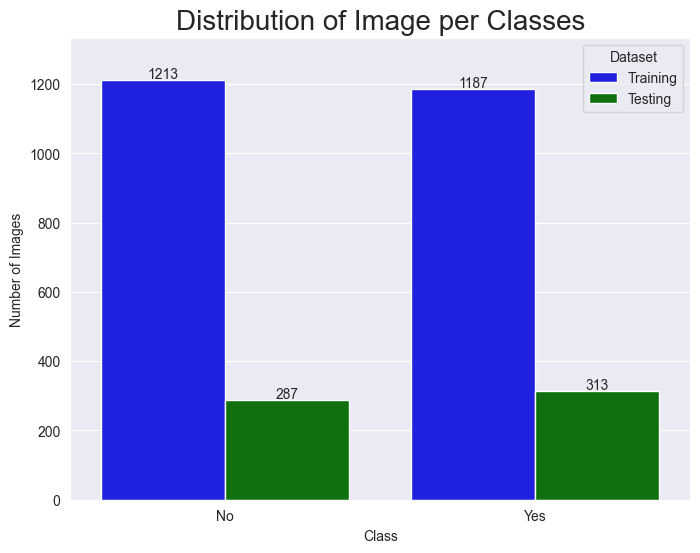

In [70]:
# Count the number of images for each class in the training and testing datasets
train_counts = np.unique(y_train, return_counts=True)
test_counts = np.unique(y_test, return_counts=True)

# Combine the count values into a single data frame
counts_df = pd.DataFrame({
    "Class": ["No", "Yes"],
    "Training": train_counts[1],
    "Testing": test_counts[1]
})

# Melt the data frame into a long format
counts_melt = counts_df.melt(id_vars=["Class"], var_name="Dataset", value_name="Count")
colors = ["blue", "green"]
sns.set_style(style="darkgrid")

# Create a bar plot with the count values displayed above each bar
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Class", y="Count", hue="Dataset", data=counts_melt, palette=colors)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.ylim([0, max(counts_melt["Count"]) * 1.1])
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 5
    ax.text(x, y, str(int(height)), ha="center")

plt.title("Distribution of Image per Classes" , fontdict={'size':20})
plt.show()

# Model 1: CNN Model

In [81]:

# Load and normalize the images
X_train_norm = np.array(load_images(X_train))
X_test_norm = np.array(load_images(X_test))

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model for 20 epochs
history = model.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test))


Epoch 1/20
75/75 [==============================] - 41s 531ms/step - loss: 0.6930 - accuracy: 0.5192 - val_loss: 0.6909 - val_accuracy: 0.6333
Epoch 2/20
75/75 [==============================] - 40s 528ms/step - loss: 0.5952 - accuracy: 0.6662 - val_loss: 0.5449 - val_accuracy: 0.7150
Epoch 3/20
75/75 [==============================] - 39s 518ms/step - loss: 0.4988 - accuracy: 0.7521 - val_loss: 0.6035 - val_accuracy: 0.6433
Epoch 4/20
75/75 [==============================] - 35s 471ms/step - loss: 0.4697 - accuracy: 0.7821 - val_loss: 0.4897 - val_accuracy: 0.7583
Epoch 5/20
75/75 [==============================] - 35s 464ms/step - loss: 0.4101 - accuracy: 0.8158 - val_loss: 0.4424 - val_accuracy: 0.7917
Epoch 6/20
75/75 [==============================] - 35s 461ms/step - loss: 0.3464 - accuracy: 0.8525 - val_loss: 0.3919 - val_accuracy: 0.8433
Epoch 7/20
75/75 [==============================] - 35s 461ms/step - loss: 0.2896 - accuracy: 0.8879 - val_loss: 0.3277 - val_accuracy: 0.8717

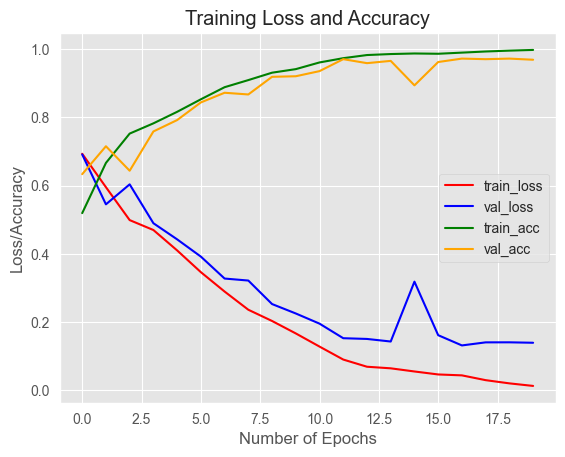

In [86]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot( history.history["loss"], color='red', label="train_loss")
plt.plot( history.history["val_loss"], color='blue', label="val_loss")
plt.plot( history.history["accuracy"], color='green', label="train_acc")
plt.plot( history.history["val_accuracy"], color='orange', label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.show()
